## Instructor Demo: Simulation of Stock Price Trajectory

This program executes a single simulation of stock price trajectory over the next `252` trading days (or year of trading) for `AAPL` stock, based on a normal probability distribution of historical average daily returns derived from the sample mean and standard deviation.

In [1]:
# Import libraries and dependencies
import os
import numpy as np
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

### Get 4 Years Worth of Data via API Call and Read in as DataFrame 

In [3]:
# Set the ticker
ticker = "AAPL"

# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes of 4 years from Today
start_date = pd.Timestamp("2017-05-04", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-04", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for AAPL
ticker_data = api.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

ticker_data.head()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2017-05-04 04:00:00+00:00,146.52,147.14,145.81,146.53,23371925,140290,146.348237
2017-05-05 04:00:00+00:00,146.76,148.98,146.76,148.96,27359822,157911,148.248475
2017-05-08 04:00:00+00:00,149.03,153.70,149.03,153.01,48864610,255930,152.033116
2017-05-09 04:00:00+00:00,153.88,154.88,153.45,153.99,39135644,221722,154.114338
2017-05-10 04:00:00+00:00,153.63,153.94,152.11,153.26,25807492,156839,153.101049


In [4]:
# Reorganize the DataFrame
ticker_data = pd.concat([ticker_data], axis=1, keys=["AAPL"])

# Display sample data
ticker_data.head()

AAPL                                    \
                             open    high     low   close    volume   
timestamp                                                             
2017-05-04 04:00:00+00:00  146.52  147.14  145.81  146.53  23371925   
2017-05-05 04:00:00+00:00  146.76  148.98  146.76  148.96  27359822   
2017-05-08 04:00:00+00:00  149.03  153.70  149.03  153.01  48864610   
2017-05-09 04:00:00+00:00  153.88  154.88  153.45  153.99  39135644   
2017-05-10 04:00:00+00:00  153.63  153.94  152.11  153.26  25807492   

                                                   
                          trade_count        vwap  
timestamp                                          
2017-05-04 04:00:00+00:00      140290  146.348237  
2017-05-05 04:00:00+00:00      157911  148.248475  
2017-05-08 04:00:00+00:00      255930  152.033116  
2017-05-09 04:00:00+00:00      221722  154.114338  
2017-05-10 04:00:00+00:00      156839  153.101049

### Run the Monte Carlo Simulation

In [13]:
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast one year daily returns
# YOUR CODE HERE!
AAPL_MC = MCSimulation(
    portfolio_data=ticker_data,
    num_simulation=num_sims,
    num_trading_days=252
    
)


In [16]:
# Run Monte Carlo simulations to forecast one year daily returns
# YOUR CODE HERE!
AAPL_MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\Notebook3\Rutgers\BootCamp\01-Lesson-Plans\05-APIS\3\Activities\05-Ins_Simulation_of_Stock_Price_Trajectory\Unsolved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.054244,1.011131,0.952404,1.014012,1.069654,0.995037,1.015136,1.048685,0.931069,1.023882,...,0.978850,0.979464,0.960723,0.979604,0.961228,0.988448,1.050620,1.036124,0.963983,0.992420
2,1.016734,1.042860,0.984107,1.022179,1.094159,1.009294,1.007869,1.014101,0.954303,1.003731,...,0.950425,0.959624,0.997275,0.995563,0.946210,1.013860,1.063920,1.000962,0.993552,0.963770
3,1.005280,1.072279,1.004356,1.017769,1.059008,1.009136,1.055958,0.985361,0.921605,0.951036,...,0.909589,0.961582,1.012591,0.961763,0.925809,1.072972,1.000541,1.011509,1.041047,1.019612
4,0.960251,1.083089,0.998539,1.053979,1.049774,0.979159,1.072413,0.990665,0.902226,1.004118,...,0.869090,0.990093,1.034031,0.998265,0.928249,1.091626,0.976047,0.974953,1.078928,1.055249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.667748,1.044815,0.432230,1.444615,1.670969,0.983536,1.790747,0.917217,1.025760,0.536284,...,0.673487,0.831503,2.130390,0.333986,1.222077,1.181804,1.309581,0.305644,0.903958,1.270115
249,0.656063,1.036518,0.417619,1.499593,1.685865,0.949337,1.806755,0.856405,1.006725,0.549209,...,0.688206,0.818203,2.065521,0.316320,1.185846,1.149364,1.322123,0.308768,0.956608,1.311414
250,0.659914,1.090077,0.425490,1.586982,1.601711,0.918172,1.690497,0.860921,1.028588,0.533422,...,0.648820,0.828894,2.004599,0.310398,1.208754,1.161886,1.294659,0.293365,0.924819,1.298569
251,0.643503,1.069742,0.410691,1.575167,1.567752,0.937695,1.690745,0.863584,1.038380,0.500816,...,0.688035,0.866989,1.921681,0.301150,1.220064,1.174236,1.304429,0.301870,0.903077,1.268323


### Plot the Simulated Outcomes for the Next Year (252 Traiding Days)

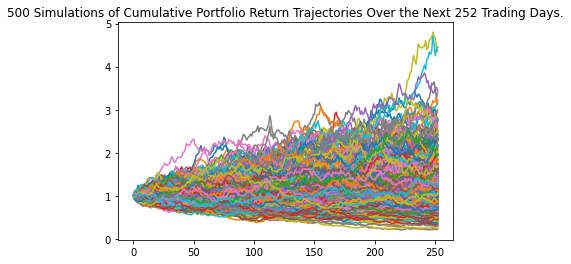

In [18]:
# Plot simulation outcomes
# YOUR CODE HERE!
sim_plot=AAPL_MC.plot_simulation()

### Plot the Simulated Daily Returns Trajectory for `AAPL` over the Next Year (252 Trading Days)

In [19]:
# Compute summary statistics from the simulated daily returns
# YOUR CODE HERE!
summary_stats=AAPL_MC.describe()

# Create a DataFrame with the summary statistics
# YOUR CODE HERE!

# Display sample data
# YOUR CODE HERE!

AttributeError: 'MCSimulation' object has no attribute 'describe'

In [9]:
# Use the `plot` function to visually analyze the trajectory of AAPL stock daily returns on a 252 trading day simulation
# YOUR CODE HERE!

### Calculate the Simulated Profits/Losses of $10,000 Investment in `AAPL` Over the Next `252` Trading Days

In [10]:
# Set initial investment
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
# YOUR CODE HERE!

# Display sample data
# YOUR CODE HERE!

### Plot the Simulated Profits/Losses of $10,000 Investment in `AAPL` Over the Next `252` Trading Days

In [11]:
# Use the 'plot' function to create a chart of the simulated profits/losses
# YOUR CODE HERE!

### Calculate the range of the possible outcomes of our $10,000 investments in `AAPL` stocks

In [12]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_AAPL.summarize_cumulative_return()

# Print summary statistics
print(tbl)

NameError: name 'MC_AAPL' is not defined

In [ ]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in AAPL stocks
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next year will end within in the range of $3914.25 and $27384.04.
